<a href="https://colab.research.google.com/github/fboldt/aulasml/blob/master/aula3a_pseudo_inversa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_diabetes
data = load_diabetes()
data.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [2]:
X, y = data['data'], data['target']
X.shape, y.shape

((442, 10), (442,))

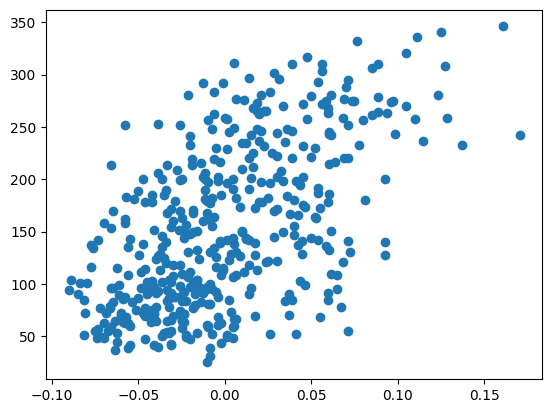

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X[:,2], y)
plt.show()

In [4]:
X2 = X[:,2:3]

In [5]:
from sklearn.metrics import mean_squared_error

3890.456589617804
[[152.13348416]
 [949.39239796]]


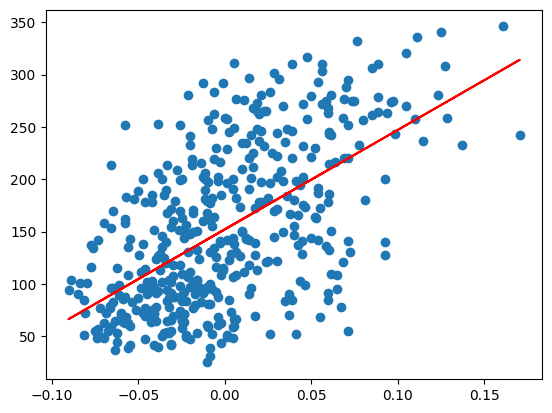

In [9]:
import numpy as np

def addBias(X):
  bias = np.ones((X.shape[0], 1))
  X_b = np.concatenate((bias, X), axis=1)
  return X_b

class regressao_linear():
  def fit(self, X, y):
    X = addBias(X)
    self.w = np.random.uniform(size=(X.shape[1], 1))
    for _ in range(10000):
      ypred = X @ self.w
      erros = ypred - y.reshape(-1,1)
      ajuste = X.T @ erros
      self.w = self.w - ajuste * 0.001
      # print(self.w, mean_squared_error(y, ypred))

  def predict(self, X):
    X = addBias(X)
    ypred = X @ self.w
    return ypred

modelo = regressao_linear()
modelo.fit(X2, y)
ypred = modelo.predict(X2)
print(mean_squared_error(y, ypred))
print(modelo.w)
plt.scatter(X2, y)
plt.plot(X2, ypred, 'r')
plt.show()

2878.7052105761645
[[ 152.13348416]
 [  -6.58364423]
 [-236.6048041 ]
 [ 529.02681615]
 [ 322.14253143]
 [ -93.3167689 ]
 [ -89.19305251]
 [-198.23407975]
 [ 110.5965262 ]
 [ 483.90262341]
 [  70.52630542]]


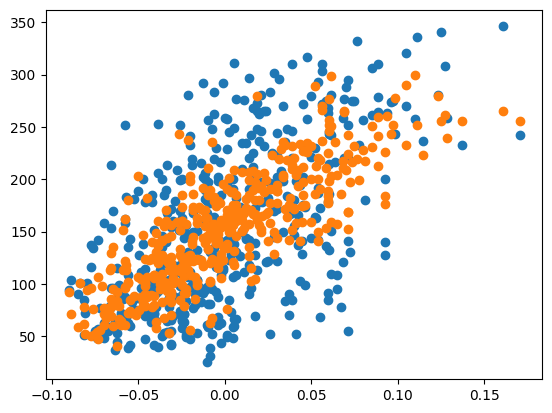

In [10]:
modelo = regressao_linear()
modelo.fit(X, y)
ypred = modelo.predict(X)
print(mean_squared_error(y, ypred))
print(modelo.w)
plt.scatter(X2, y)
plt.scatter(X2, ypred)
plt.show()

2859.69634758675
[[ 152.13348416]
 [ -10.0098663 ]
 [-239.81564367]
 [ 519.84592005]
 [ 324.3846455 ]
 [-792.17563855]
 [ 476.73902101]
 [ 101.04326794]
 [ 177.06323767]
 [ 751.27369956]
 [  67.62669218]]


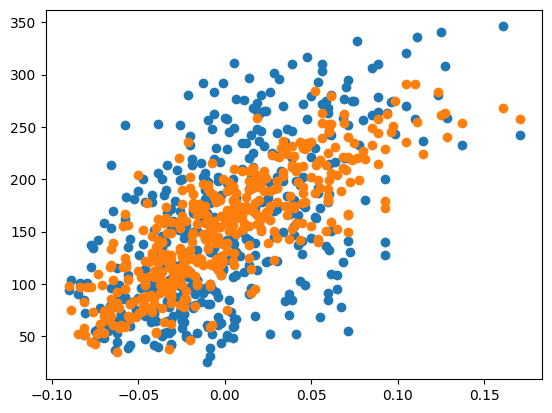

In [14]:
from numpy.linalg import pinv

def addBias(X):
  bias = np.ones((X.shape[0], 1))
  X_b = np.concatenate((bias, X), axis=1)
  return X_b

class regressao_linear():
  def fit(self, X, y):
    X = addBias(X)
    self.w = pinv(X) @ y.reshape(-1,1)

  def predict(self, X):
    X = addBias(X)
    ypred = X @ self.w
    return ypred

modelo = regressao_linear()
modelo.fit(X, y)
ypred = modelo.predict(X)
print(mean_squared_error(y, ypred))
print(modelo.w)
plt.scatter(X2, y)
plt.scatter(X2, ypred)
plt.show()

In [15]:
A = np.array([[1,2],[3,4]])
A

array([[1, 2],
       [3, 4]])

In [16]:
from numpy.linalg import inv
inv(A)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [17]:
inv(A) @ A

array([[1.00000000e+00, 0.00000000e+00],
       [1.11022302e-16, 1.00000000e+00]])

In [27]:
B = np.array([[7,2],[3,4],[5,7]])
B

array([[7, 2],
       [3, 4],
       [5, 7]])

In [29]:
Bi = inv(B.T @ B)

In [31]:
Bpi = Bi @ B.T

In [32]:
Bpi @ B

array([[ 1.00000000e+00, -6.24500451e-17],
       [-3.05311332e-16,  1.00000000e+00]])

In [33]:
C = np.array([[1,2],[3,4],[5,6],[7,8],[9,0]])
C

array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8],
       [9, 0]])

In [34]:
C.T @ C

array([[165, 100],
       [100, 120]])

In [36]:
D = np.array([[1,2,3,5,6,7],[1,4,5,6,1,3],[2,7,8,9,6,5]])
D

array([[1, 2, 3, 5, 6, 7],
       [1, 4, 5, 6, 1, 3],
       [2, 7, 8, 9, 6, 5]])

In [37]:
D.T @ D

array([[  6,  20,  24,  29,  19,  20],
       [ 20,  69,  82,  97,  58,  61],
       [ 24,  82,  98, 117,  71,  76],
       [ 29,  97, 117, 142,  90,  98],
       [ 19,  58,  71,  90,  73,  75],
       [ 20,  61,  76,  98,  75,  83]])